In [ ]:
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#이미지 경로
img_path = "/content/drive/MyDrive/images/example_01.jpg"

In [ ]:
def show_images(images):
	for i, img in enumerate(images):
		cv2.imshow("image_" + str(i), img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

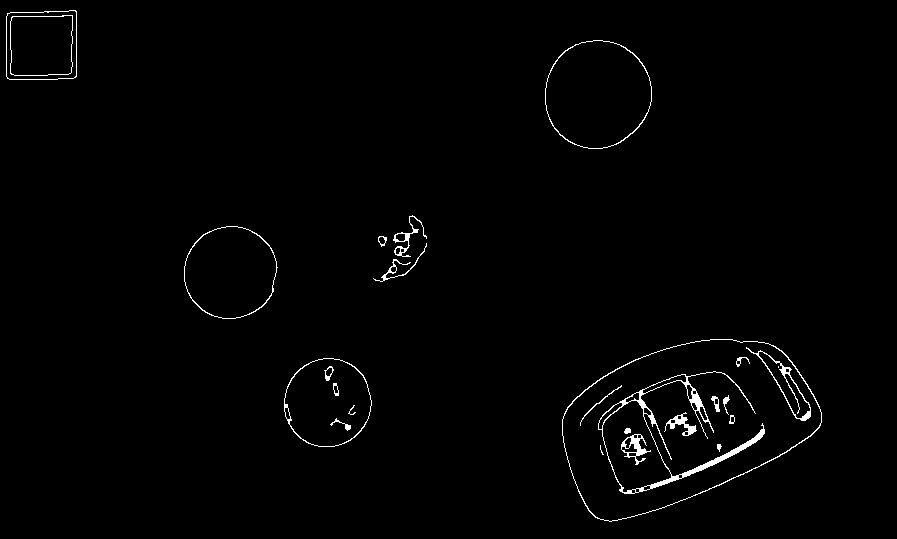

In [ ]:
#이미지 읽기
image = cv2.imread(img_path)
#이미지 전처리
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #흑백으로 바꿈
blur = cv2.GaussianBlur(gray, (9, 9), 0)#가우시안 필터

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
cv2_imshow(edged) #경계선 #전처리된 영상

총 검출된 객체의 갯수: 7


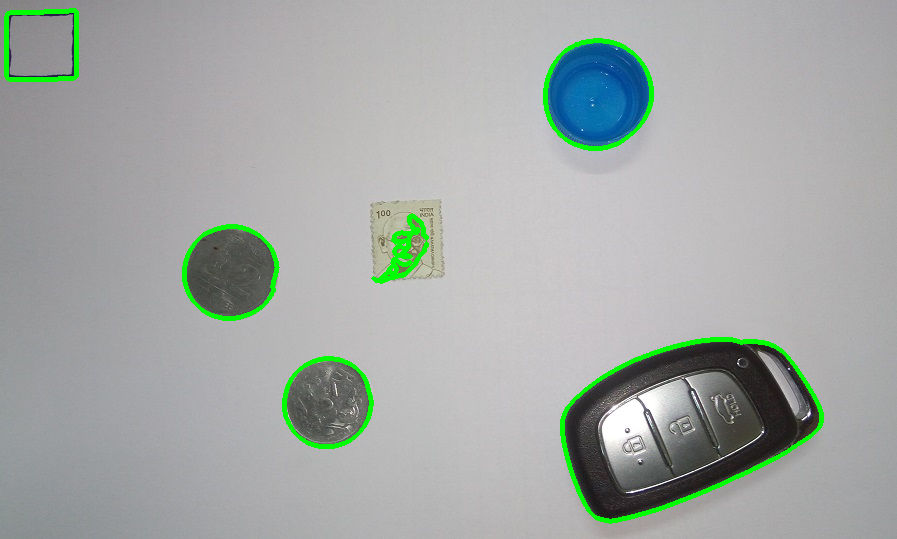

In [ ]:
# 윤각선 찾기
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#가장 왼쪽 기준 객체부터 왼->오른쪽으로 윤각선 정렬
(cnts, _) = contours.sort_contours(cnts)

# 충분히 크지않은 물체는 무시
cnts = [x for x in cnts if cv2.contourArea(x) > 75]

cv2.drawContours(image, cnts, -1, (0,255,0), 3) #물체 테두리
print("총 검출된 객체의 갯수:",len(cnts)) #배열길이= 검출된 덩어리 갯수
cv2_imshow(image) #경계선

In [ ]:
#기준 도형 (여기선 2cm X 2cm 정사각형을 기준으로함)
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dist_in_pixel = euclidean(tl, tr) #검출한 픽셀크기
dist_in_cm = 2 #기준 물체의 cm
pixel_per_cm = dist_in_pixel/dist_in_cm  #검출한 픽셀/실제 cm로 거리에 따른 비율 구함

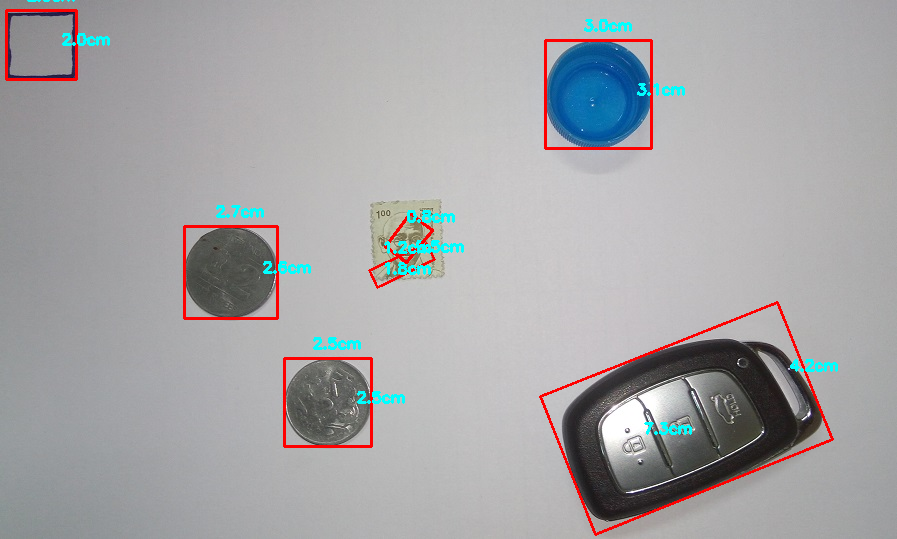

In [ ]:
# 경계선 그리기
for cnt in cnts:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box

	cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))

	wid = euclidean(tl, tr)/pixel_per_cm #가로 비율로 계산
	ht = euclidean(tr, br)/pixel_per_cm #세로 비율로 계산
	#세로 프린트
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
	#가로 프린트
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] - 15), int(mid_pt_verticle[1])),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

#이미지 show
cv2_imshow(image)